<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/3-D6_TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENAP - Especialização em Ciência de Dados aplicada a Políticas Públicas**

Trabalho Final D6 - Estatística Descritiva

Aluno: Rodrigo Santos de Paula

---

**Análise descritiva dos dados de acidentes da Ponte Rio-Niterói**

A Ponte Rio-Niterói consiste em trecho de 13.29km da BR 101 sobre a Baía de Guanabara que interliga a capital fluminense a importantes municípios da região metropolitana da cidade do Rio de Janeiro e é rota para quem cruza o estado de norte a sul e vice versa. 

A administração do trecho está concedido à Concessionária Ponte Rio-Niterói S.A., também conhecida como Ecoponte. 

O tráfego diário de veículos é de aproximadamente 150 mil veículos e qualquer acidente tem potencial de impactar no fluxo contínuo existente, especialmente considerando que não há rotas alternativas. A redução dos riscos de acidentes se tornar um objetivo constante a ser perseguido, tanto pelo aspecto da segurança operacional e proteção dos usuários, quanto pelo potencial impacto econômico.

Considerando o exposto, realiza-se a seguir análise descritiva dos dados sobre acidentes com o objetivo de conhecer o que ocorre na rodovia e poder identificar os riscos a serem tratados. 

---
**Fonte dos Dados**

Demonstrativos de Acidentes - ECOPONTE

Arquivo CSV (acessado em 31/08/2021 - 3049 ocorrências) disponibilizado pela ANTT - Agência Nacional de Transportes Terrestres no [Portal Brasileiro de Dados Abertos](https://dados.gov.br/):

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/aac38b2b-20ed-4572-98e5-3c3aafa9fe75/download/demostrativo_acidentes_ecoponte.csv.

Dicionário de Dados: 

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/47b96524-3bf9-47ef-b7a6-2d02c39d72ac/download/demostrativo_acidentes_dicionario_dados.pdf

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**CARGA E LIMPEZA DOS DADOS**

In [ ]:
#Importação do dado, limpeza e padronização básica
df = pd.read_csv("https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/aac38b2b-20ed-4572-98e5-3c3aafa9fe75/download/demostrativo_acidentes_ecoponte.csv", sep=";", encoding = "iso8859_16", parse_dates=['data'], dayfirst=True, decimal=',', dtype={'km': 'float', 'automovel':'Int64', 'bicicleta':'Int64',	'caminhao':'Int64', 'moto':'Int64', 'onibus':	'Int64', 'outros': 'Int64', 'tracao_animal': 'Int64', 'transporte_de_cargas_especiais': 'Int64', 'trator_maquinas':'Int64',	'utilitarios': 'Int64', 'ilesos':'Int64',	'levemente_feridos':'Int64',	'moderadamente_feridos': 'Int64',	'gravemente_feridos': 'Int64',	'mortos': 'Int64'}).fillna(value=0)

In [ ]:
# Transformando as duas colunas "data" e "horario" em uma só para facilitar a manipulação pelas funções das bibliotecas pandas e datetime
df['data_hora'] = pd.to_timedelta(df['horario'])+df['data']
df.drop(columns=['horario', 'data'], inplace=True)

In [ ]:
# Vamos analisar o conteúdo da colula "tipo_de_ocorrencia"
df['tipo_de_ocorrencia'].value_counts()


sem vítima                          1633
com vítima                           958
AC02 - Acidente com VITIMA           247
AC03 - Acidente sem VITIMA           170
ac03 - Acidente com vítima ilesa      25
ac02 - Acidente com vítima            15
ac01 - Acidente com vitima fatal       1
Name: tipo_de_ocorrencia, dtype: int64

In [ ]:
# Verificamos que o único objetivo dela é sinalizar se a ocorrência teve ou não vítima.
# Vamos padronizar essa sinalização em outra coluna com valores booleanos
df.loc[df['tipo_de_ocorrencia']=='AC02 - Acidente com VITIMA', 'teve_vitima']=True
df.loc[df['tipo_de_ocorrencia']=='AC03 - Acidente sem VITIMA', 'teve_vitima']=False
df.loc[df['tipo_de_ocorrencia']=='sem vítima', 'teve_vitima']=False
df.loc[df['tipo_de_ocorrencia']=='com vítima', 'teve_vitima']=True

In [ ]:
# Conferindo os valores da nova coluna. Ok.
df['teve_vitima'].value_counts()

False    1803
True     1205
Name: teve_vitima, dtype: int64

In [ ]:
# Não precisamos mais da coluna "tipo_de_ocorrencia" e também não precisamos da coluna "n_da_ocorrencia" nem da "concessionaria"
df.drop(columns=['n_da_ocorrencia', 'tipo_de_ocorrencia', 'concessionaria'], inplace=True)

In [ ]:
# Vamos analisar o conteúdo da coluna "trecho"
df['trecho'].value_counts()

BR-101/RJ                 2591
Acessos Niterói            115
Cajú                        67
Retăo                       50
Emergência I                40
Subida do Văo Central       39
Descida do Văo Central      34
PT                          34
Văo Central                 21
Curvăo                      20
Praça de Pedágio            13
Emergência II               11
Mocangue                     7
R1                           3
N03                          2
N10                          1
N01                          1
Name: trecho, dtype: int64

In [ ]:
# Como os trechos diferentes de "BR-101/RJ, mais detalhados, só começaram a ser utilizados em 2020 e a análise que faremos retroagirá mais, 
# não utilizaremos essa coluna, mas somente as do sentido e do km"
df.drop(columns=['trecho'], inplace=True)

In [ ]:
# Reordenando colunas (trazendo as duas recém criadas para frente)
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

# Imprimindo o conjunto de dados limpo e pronto para o trabalho
df

,data_hora,teve_vitima,km,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
0,2015-06-01 13:02:00,True,327.000,Sul,Colisăo - Traseira,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,2015-06-01 12:04:00,True,334.000,Norte,Choque com objeto sobre a pista,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,2015-06-02 07:21:00,True,325.000,Sul,Queda de moto,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2015-06-02 19:04:00,False,328.000,Norte,Colisăo - Traseira,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,2015-06-04 17:41:00,False,322.000,Norte,Colisăo - Traseira,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,2021-07-30 14:14:47,NaN,322.255,Sul,Colisăo lateral no mesmo sentido,2,0,1,0,0,0,0,0,0,0,3,0,0,0,0
3045,2021-07-30 16:32:50,NaN,323.070,Norte,Engavetamento,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3046,2021-07-30 22:50:51,NaN,327.600,Norte,Colisăo Traseira,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0
3047,2021-07-31 10:49:17,NaN,0.000,Sul,Colisăo Traseira,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data_hora                       3049 non-null   datetime64[ns]
 1   teve_vitima                     3008 non-null   object        
 2   km                              3049 non-null   float64       
 3   sentido                         3049 non-null   object        
 4   tipo_de_acidente                3049 non-null   object        
 5   automovel                       3049 non-null   Int64         
 6   bicicleta                       3049 non-null   Int64         
 7   caminhao                        3049 non-null   Int64         
 8   moto                            3049 non-null   Int64         
 9   onibus                          3049 non-null   Int64         
 10  outros                          3049 non-null   Int64         
 11  trac

**DESCRIÇÃO DE VARIÁVEIS**

"data_hora" - a parte da data é **Qualitativa Ordinal**, a parte da hora é **Qualitativa Nominal**.
 
"teve_vitima", "km", "sentido" "tipo_de_acidente" - **Qualitativa Nominal**        
 
 "automovel", "bicicleta", "caminhao", "moto", "onibus", "outros", "tracao_animal", "transporte_de_cargas_especiais", "trator_maquinas", "utilitarios", "ilesos", "levemente_feridos", "moderadamente_feridos","gravemente_feridos", "mortos" - **Quantitativa Discreta**

### O conjunto de dados apresenta 3049 ocorrências registradas entre 01/06/2015 e 28/06/2021.


---
**ANÁLISE DOS DADOS**


**Totais e médias por períodos** 

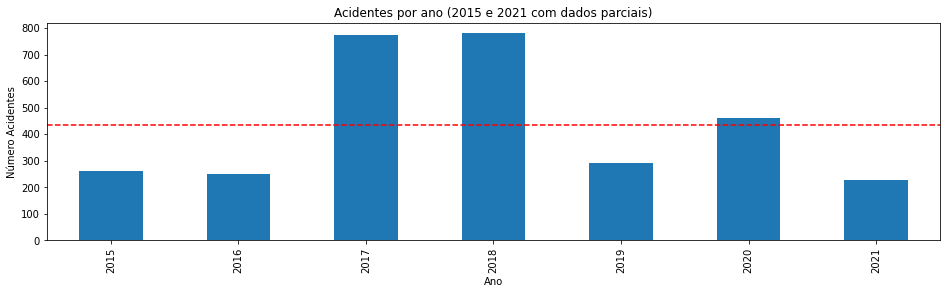

In [ ]:
fig, axs = plt.subplots(figsize=(16, 4))
df.groupby(df["data_hora"].dt.year)['data_hora'].count().plot.bar()
axs.set_title("Acidentes por ano (2015 e 2021 com dados parciais)")
axs.set_xlabel("Ano")
axs.set_ylabel("Número Acidentes")
plt.axhline(df.groupby(df["data_hora"].dt.year)['data_hora'].count().mean(), color='r', linestyle='--', label='média')
plt.show()

**Análise:** Mesmo ignorando-se os anos de 2015 e 2021 pelo conjunto de dados não terem dados completos dos respectivos períodos, verifica-se uma diferença expressiva entre os anos de 2017 e 2018 dos demais, 2016, 2019 e 2020. E ainda considerando a redução de veículos em circulação, especialmente em 2020, devido à pandemia, continua havendo uma diferença muito grande entre os demais anos. Registra-se ainda que mesmo com a circulação de veículos reduzida, 2020 ficou um pouco acima da média. 

Ou seja, trata-se de um ponto de atenção que poderia ser melhor explorado para identificação das causas dessa discrepânciados anos 2017 e 2018. 

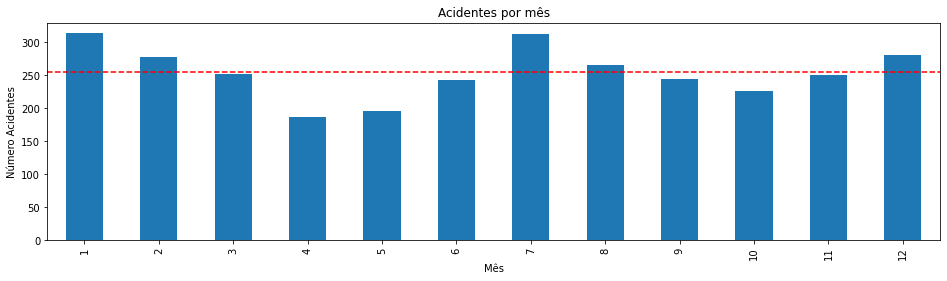

In [ ]:
fig, axs = plt.subplots(figsize=(16, 4))
df.groupby(df["data_hora"].dt.month)['data_hora'].count().plot.bar()
axs.set_title("Acidentes por mês")
axs.set_xlabel("Mês")
axs.set_ylabel("Número Acidentes")
plt.axhline(df.groupby(df["data_hora"].dt.month)['data_hora'].count().mean(), color='r', linestyle='--', label='média')
plt.show()


In [ ]:
df.groupby(df["data_hora"].dt.month)['data_hora'].count()

data_hora
1     314
2     278
3     252
4     186
5     196
6     243
7     313
8     266
9     244
10    226
11    251
12    280
Name: data_hora, dtype: int64

**Análise:** Verifica-se que os meses com os maiores números de acidentes são janeiro, fevereiro, julho e dezembro. Seria desejável estender a análise em um trabalho futuro adicionando-se dados sobre o tráfego. Uma hipótese também a ser investigada seria a relação com período de férias.

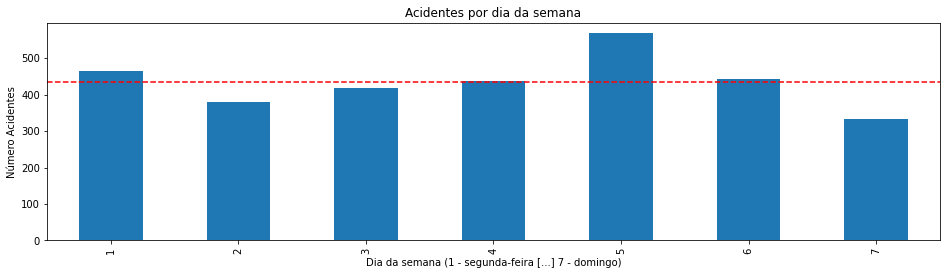

In [ ]:
fig, axs = plt.subplots(figsize=(16, 4))
df.groupby(df["data_hora"].dt.weekday +1)['data_hora'].count().plot.bar()
axs.set_title("Acidentes por dia da semana")
axs.set_xlabel("Dia da semana (1 - segunda-feira [...] 7 - domingo)")
axs.set_ylabel("Número Acidentes")
plt.axhline(df.groupby(df["data_hora"].dt.weekday +1)['data_hora'].count().mean(), color='r', linestyle='--', label='média')
plt.show()

**Análise:** Verifica-se que a sexta-feira é o dia com o maior número de ocorrências e o domingo o dia com menor número. Ambos destacando-se da média.

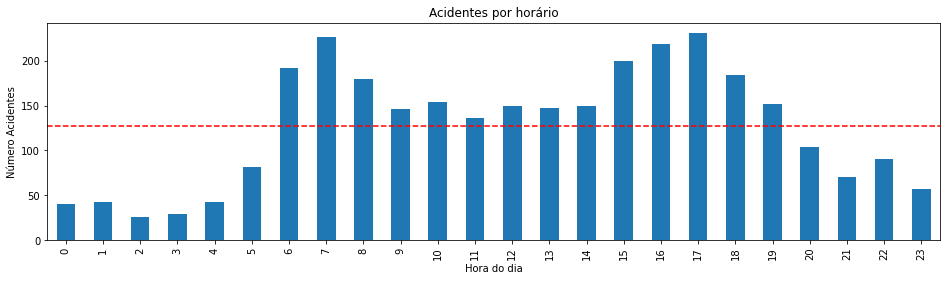

In [ ]:
fig, axs = plt.subplots(figsize=(16, 4))
df.groupby(df["data_hora"].dt.hour)['data_hora'].count().plot.bar()
axs.set_title("Acidentes por horário")
axs.set_xlabel("Hora do dia")
axs.set_ylabel("Número Acidentes")
plt.axhline(df.groupby(df["data_hora"].dt.hour)['data_hora'].count().mean(), color='r', linestyle='--', label='média')
plt.show()

**Análise:** Constata-se que há uma correspondência entre o número de acidentes e os horários típicos de rush, evidenciando a já esperada relação direta com o volume de tráfego. Cabe porém uma análise da gravidade e dos tipos de acidentes por horário.

**Inserindo mais uma variável: Ocorrência com ou sem feridos?**

In [ ]:
dfcomvitima = df[df.teve_vitima==True].groupby(df["data_hora"].dt.hour).count()['data_hora']
dfsemvitima = df[df.teve_vitima==False].groupby(df["data_hora"].dt.hour).count()['data_hora']

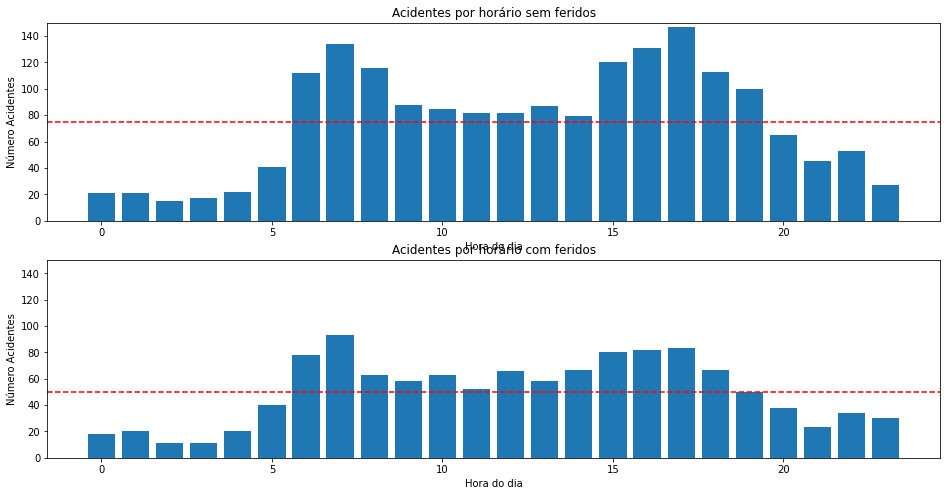

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(16, 8))
dfcomvitima = df[df.teve_vitima==True].groupby(df["data_hora"].dt.hour).count()['data_hora']
dfsemvitima = df[df.teve_vitima==False].groupby(df["data_hora"].dt.hour).count()['data_hora']

ax[0].bar(x=dfsemvitima.index, height=dfsemvitima)
ax[0].set_title("Acidentes por horário sem feridos")
ax[0].set_xlabel("Hora do dia")
ax[0].set_ylabel("Número Acidentes")
ax[0].axhline(dfsemvitima.mean(), color='r', linestyle='--', label='média')
ax[0].set_ylim(0,150)

ax[1].bar(x=dfcomvitima.index, height=dfcomvitima)
ax[1].set_title("Acidentes por horário com feridos")
ax[1].set_xlabel("Hora do dia")
ax[1].set_ylabel("Número Acidentes")
ax[1].axhline(dfcomvitima.mean(), color='r', linestyle='--', label='média')
ax[1].set_ylim(0,150)

plt.show()


In [ ]:
#Calculando o percentual de ocorrências com feridos  por horário
resultado = df.groupby([df["teve_vitima"], df["data_hora"].dt.hour])['data_hora'].count()
resultado = pd.DataFrame(resultado)
percentual_com_feridos = resultado['data_hora'][True]/(resultado['data_hora'][False]+resultado['data_hora'][False])*100
percentual_com_feridos

data_hora
0     42.857143
1     47.619048
2     36.666667
3     32.352941
4     45.454545
5     48.780488
6     34.821429
7     34.701493
8     27.155172
9     32.954545
10    37.058824
11    31.707317
12    40.243902
13    33.333333
14    42.405063
15    33.333333
16    31.297710
17    28.231293
18    29.646018
19    25.000000
20    29.230769
21    25.555556
22    32.075472
23    55.555556
Name: data_hora, dtype: float64

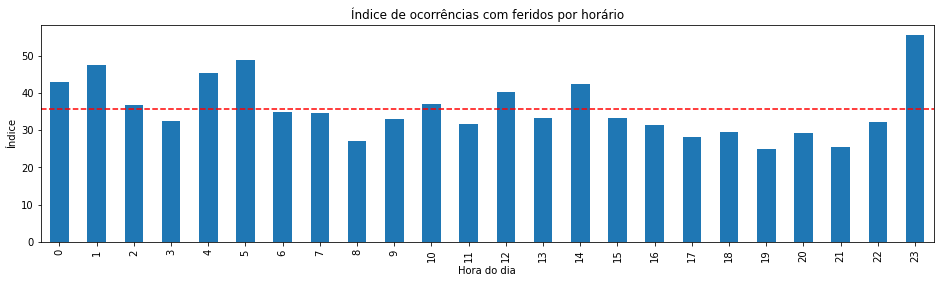

In [ ]:
fig, axs = plt.subplots(figsize=(16, 4))
percentual_com_feridos.plot.bar()
axs.set_title("Índice de ocorrências com feridos por horário")
axs.set_xlabel("Hora do dia")
axs.set_ylabel("Índice")
plt.axhline(percentual_com_feridos.mean(), color='r', linestyle='--', label='média')
plt.show()

**Análise:** Verifica-se que a despeito do volume de tráfego, o índice de ocorrências com feridos é maior no período com menos ocorrências, o que demonstra que, nesse caso, não há uma relação direta com o tráfego. Destaca-se o alto índice de ocorrências com feridos a partir das 23 horas até o fim da madrugada.

In [ ]:
#Calculando o índice ocorrências com feridos sobre o índice de ocorrência sem feridos por dia da semana
resultado = df.groupby([df["teve_vitima"], df["data_hora"].dt.weekday+1])['data_hora'].count()
resultado = pd.DataFrame(resultado)
percentual_com_feridos = resultado['data_hora'][True]/(resultado['data_hora'][False]+resultado['data_hora'][True])*100
percentual_com_feridos

data_hora
1    41.468683
2    41.952507
3    41.445783
4    33.333333
5    38.808664
6    40.689655
7    44.242424
Name: data_hora, dtype: float64

**Análise:** Segunda (1)[...]Domingo (7). O dia com maior índices de ocorrência com vítima é o domingo, provavelmente refletindo acidentes da madrugada (passível de confirmação). 



**Ocorrências diárias**

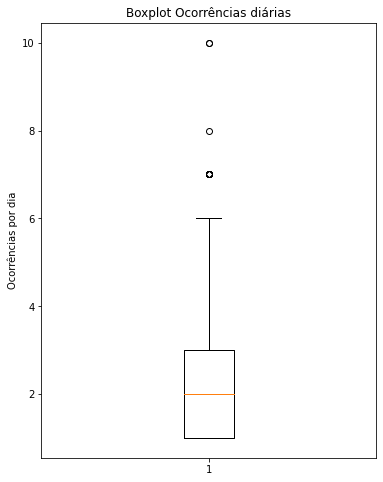

In [ ]:
ocorrencias_pordia['numOcorrencias'] = df.groupby(df["data_hora"].dt.date)['data_hora'].count().astype('float64')
ocorrencias_pordia = pd.DataFrame(ocorrencias_pordia)
ocorrencias_pordia.drop(columns='data_hora', inplace=True)
fig, ax = plt.subplots(figsize=(6, 8))
ax.boxplot(ocorrencias_pordia["numOcorrencias"])
ax.set_ylabel("Ocorrências por dia")
ax.set_title("Boxplot Ocorrências diárias")
plt.suptitle("")
plt.show()

In [ ]:
ocorrencias_pordia.quantile(.25)

numOcorrencias    1.0
Name: 0.25, dtype: float64

**Análise:** Aproximadamente metade dias tem até cerca 2 ocorrências (acidentes) e 75% dos dias tem até cerca de 3 ocorrências. Há alguns dias atípicos (outliers) em que ocorreram de 7 a 10 acidentes.

**Feridos por gravidade e período(ano)**

In [ ]:
ocorrencias_porgravidade_pordia = df[['data_hora', 'levemente_feridos', 'moderadamente_feridos',	'gravemente_feridos',	'mortos']].groupby(df["data_hora"].dt.year).sum()
ocorrencias_porgravidade_pordia = pd.DataFrame(ocorrencias_porgravidade_pordia)
ocorrencias_porgravidade_pordia

,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
data_hora,,,,
2015,120,54,4,4
2016,170,47,19,4
2017,212,67,9,0
2018,224,81,6,4
2019,204,30,10,4
2020,455,41,19,1
2021,270,13,7,1


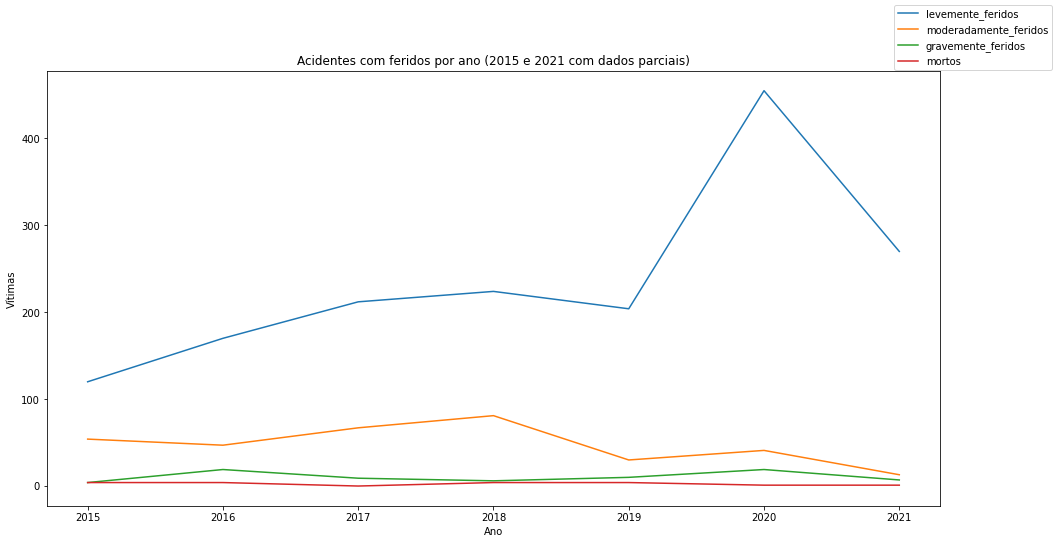

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8))

axs.set_title("Acidentes com feridos por ano (2015 e 2021 com dados parciais)")
axs.set_xlabel("Ano")
axs.set_ylabel("Vítimas")
axs.plot(ocorrencias_porgravidade_pordia)
fig.legend(['levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos'])
plt.show()

**Análise**: Considerando que os dados de 2021 compreendem metade do ano, é possível notar um aumento expressivo no número de vítimas levemente feridas. Uma possibilidade que não pode ser ignorada é o aumento da qualidade dos registros desses casos a partir de 2020, visto que os demais casos praticamente não aumentaram.

**Em quais locais (km) ocorreram os acidentes**

In [ ]:
#Analisando os locais (sentido e km) dos acidentes
dflocalacidentes = df.copy()
dflocalacidentes['km'] = df['km'].round()
dflocalacidentes = dflocalacidentes.groupby(['sentido','km']).count()
dflocalacidentes = pd.DataFrame([dflocalacidentes.index.get_level_values('sentido').values, dflocalacidentes.index.get_level_values('km').values, dflocalacidentes['data_hora']])
dflocalacidentes = dflocalacidentes.transpose()
dflocalacidentes.columns = ['sentido', 'km', 'acidentes'];
dflocalacidentes.set_index(['sentido','km'], inplace=True)

#Separando os sentidos
dfNorte = dflocalacidentes.query('sentido=="Norte"')
dfSul = dflocalacidentes.query('sentido=="Sul"')

#Limpando dados 
dfNorte = dfNorte.droplevel(0)
dfSul = dfSul.droplevel(0)
dfNorte.drop(0, inplace=True)
dfSul.drop([0,1], inplace=True)

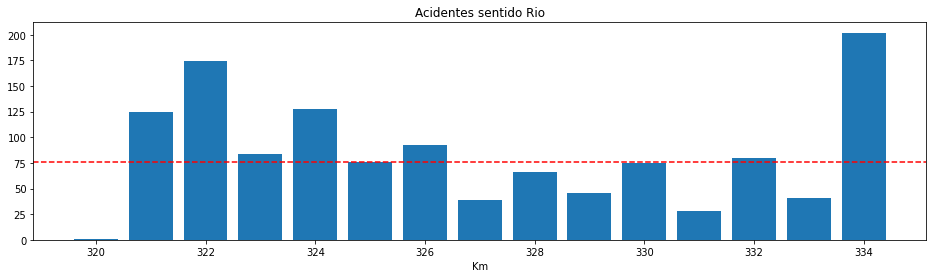

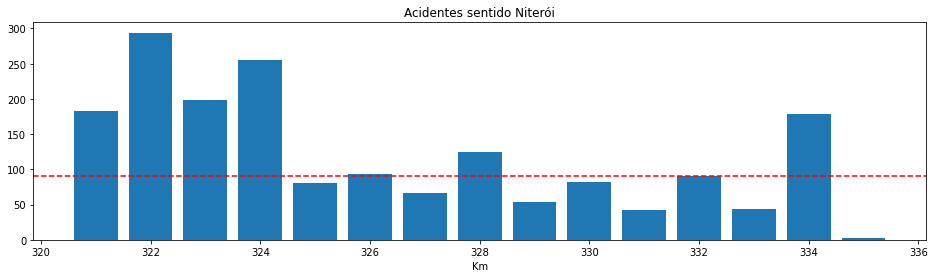

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(x=dfSul.index, height=dfSul.acidentes)
ax.set_title("Acidentes sentido Rio")
ax.set_xlabel("Km")
plt.axhline(dfSul['acidentes'].median(), color='r', linestyle='--', label='média')
plt.show()

fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(x=dfNorte.index, height=dfNorte.acidentes)
ax.set_title("Acidentes sentido Niterói")
ax.set_xlabel("Km")
ax.axhline(dfNorte['acidentes'].median(), color='r', linestyle='--', label='média')
plt.show()


**Análise**: Os gráficos indicam uma prevalência de ocorrência no sentido Niterói, que apresenta uma mediana de aproximadamente 90 ocorrências, considerando os 15 km monitorados, contra 75 no sentido Rio. Verifica-se que os maiores volumes de acidentes ocorrem nos extremos iniciais e finais de cada sentido.

In [ ]:
#Identificando os tipos de acidente com poucas ocorrências (até 15) para enquadrá-los na categoria "Outros"
dfTipos = pd.DataFrame(df.groupby([df["tipo_de_acidente"]])['data_hora'].count() >15).reset_index()
dfTipos.columns = ['tipo', 'representativo']
tiposAgrupados = dfTipos[dfTipos['representativo']==False]['tipo']
tiposAgrupados.values

array(['Atropelamento - Pedestre', 'Atropelamento Ciclista',
       'Atropelamento de Animal', 'Choque - Canaleta', 'Choque - Defensa',
       'Choque - Meio fio', 'Choque - Pilar', 'Choque - Poste',
       'Choque - Veiculo parado na pista', 'Choque Praça - Cabine',
       'Choque Talude', 'Choque com objeto sobre a pist',
       'Choque com objeto sobre a pista',
       'Choque com veículo na faixa de', 'Colisăo - Frontal',
       'Colisăo lateral no mesmo sentido', 'Queda de Moto', 'Tombamento'],
      dtype=object)

In [ ]:
def tipoAgrupar(linha, tipos):
  if linha['tipo_de_acidente'] in tipos:
    return 'Outros'
  else:
    return linha['tipo_de_acidente']

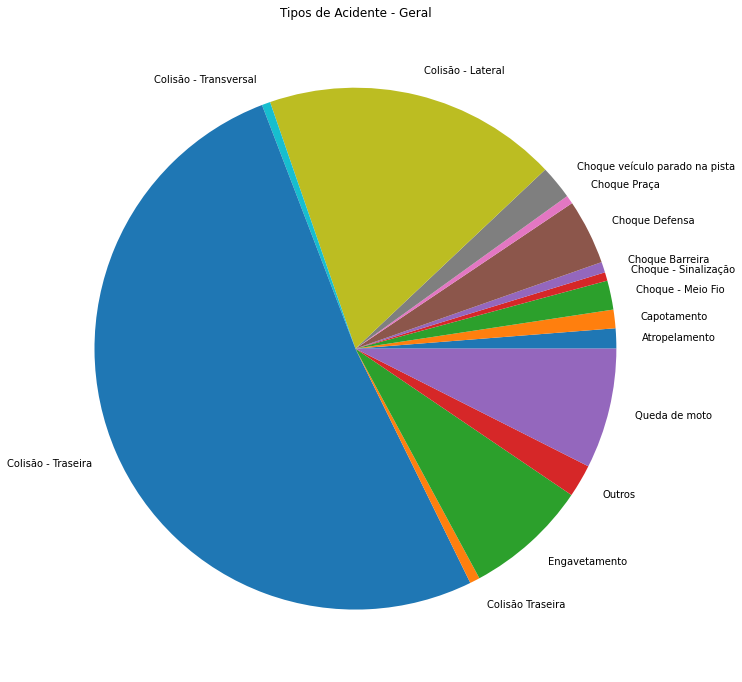

In [ ]:
#agrupando a categoria "Outros"
df['tipo_resumido'] = df.apply(tipoAgrupar, axis=1, args=([tiposAgrupados.values]))
#plotando o gráfico
fig , ax = plt.subplots(figsize=(12,12))
df.groupby([df["tipo_resumido"]])['data_hora'].count().plot.pie()
ax.set_ylabel("")
ax.set_title("Tipos de Acidente - Geral")
plt.show()


**Análise**: Um pouco mais da metade das ocorrências se referem à Colisão Traseida, seguindo por Colisão Lateral, Engavetamento, Queda de moto e Choque Defensa.

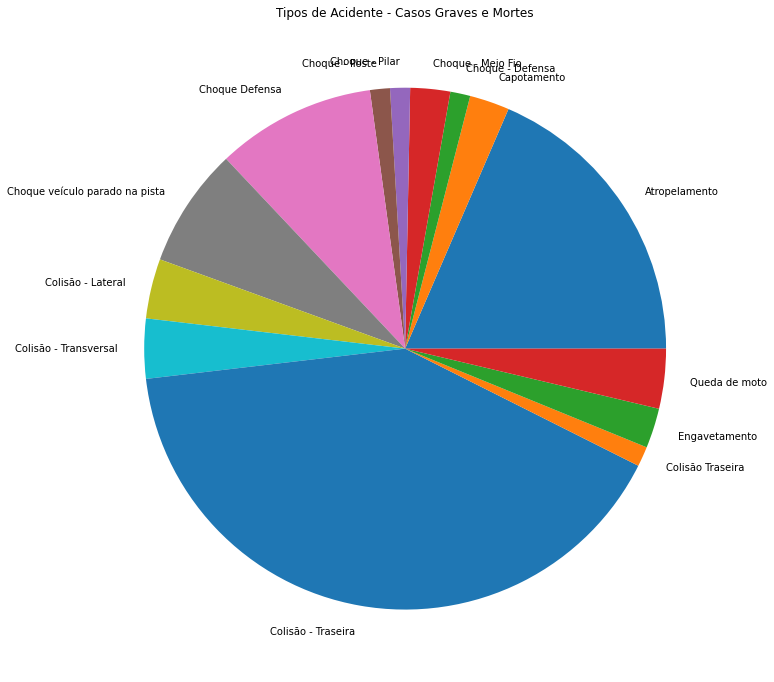

In [ ]:
fig , ax = plt.subplots(figsize=(12,12))
dfMortesEGraves = df[(df.mortos > 0) | (df.gravemente_feridos > 0)]
dfMortesEGraves.groupby([df["tipo_de_acidente"]])['data_hora'].count().plot.pie()
ax.set_ylabel("")
ax.set_title("Tipos de Acidente - Casos Graves e Mortes")
plt.show()


**Análise**: Selecionando-se somente as ocorrências com vítimas graves ou mortes, verifica-se que o Atropelamento, Choque Defensa e o Choque com veículo parado na pista ganham relevância, projetando-se à frente da Queda de Moto.

In [ ]:
df.corr()

,km,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
km,1.000000,0.017366,-0.011064,0.022520,0.013081,0.004584,-0.001702,NaN,NaN,NaN,0.022475,0.020641,0.005384,-0.001161,-0.018833,-0.095450
automovel,0.017366,1.000000,-0.011409,-0.230420,-0.392004,-0.199273,-0.015009,NaN,NaN,NaN,-0.149977,0.349526,0.084646,-0.079863,-0.047789,-0.034842
bicicleta,-0.011064,-0.011409,1.000000,-0.011299,-0.018739,-0.009809,-0.001800,NaN,NaN,NaN,-0.009725,-0.006160,0.003267,0.018715,-0.004288,-0.002294
caminhao,0.022520,-0.230420,-0.011299,1.000000,-0.147024,-0.003489,-0.007198,NaN,NaN,NaN,-0.028077,0.046845,0.018730,-0.043220,-0.001553,0.021307
moto,0.013081,-0.392004,-0.018739,-0.147024,1.000000,-0.126960,-0.009534,NaN,NaN,NaN,-0.074508,-0.247847,0.143325,0.200650,0.077541,0.026345
onibus,0.004584,-0.199273,-0.009809,-0.003489,-0.126960,1.000000,-0.017929,NaN,NaN,NaN,-0.021082,0.016905,-0.023712,-0.027667,0.007409,0.013892
outros,-0.001702,-0.015009,-0.001800,-0.007198,-0.009534,-0.017929,1.000000,NaN,NaN,NaN,-0.017775,-0.002273,0.022042,-0.016670,-0.007838,-0.004192
tracao_animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transporte_de_cargas_especiais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trator_maquinas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Análise:** Não foi encontrada nenhuma correlação entre as variáveis quantitativas utilizando-se a função .corr()

**Acidentes por tipo de veículo e período do dia**

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

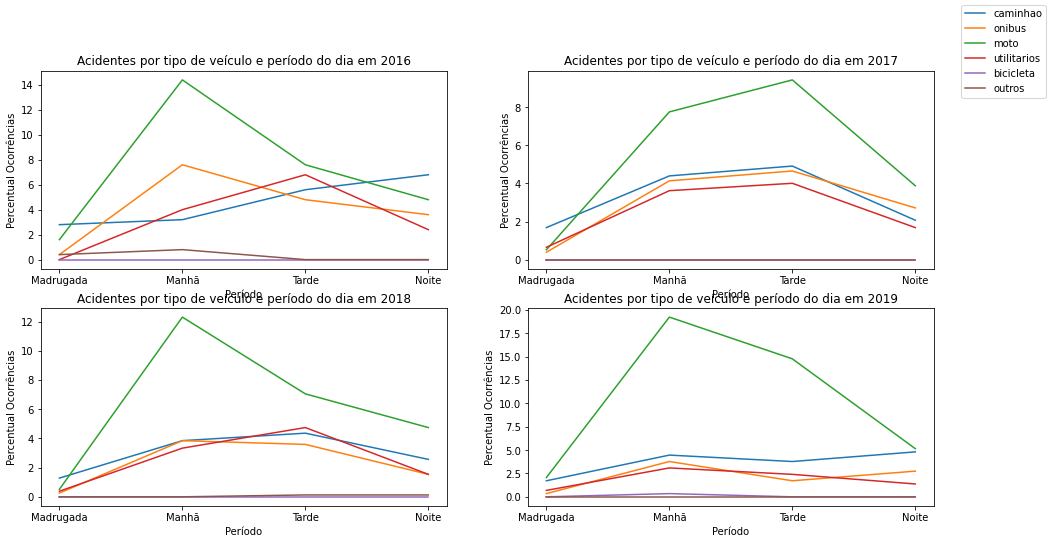

In [ ]:
# define the bins
bins = [0, 6, 12, 18, 24]

# add custom labels if desired
labels = ['Madrugada','Manhã','Tarde','Noite']

# add the bins to the dataframe
df['PeriodoDia'] = pd.cut(df['data_hora'].dt.hour, bins, labels=labels, right=False)

fig, axs = plt.subplots(2,2, figsize=(16, 8))


axs[0,0].set_title("Acidentes por tipo de veículo e período do dia em 2016")
axs[0,0].set_xlabel("Período")
axs[0,0].set_ylabel("Percentual Ocorrências")
mydf = df.loc[df['data_hora'].dt.year == 2016][['PeriodoDia', 'caminhao', 'onibus', 'moto', 'utilitarios', 'bicicleta', 'outros']].groupby(['PeriodoDia']).sum()/df.loc[df['data_hora'].dt.year == 2016].count()[0]*100
axs[0,0].plot(mydf)

axs[0,1].set_title("Acidentes por tipo de veículo e período do dia em 2017")
axs[0,1].set_xlabel("Período")
axs[0,1].set_ylabel("Percentual Ocorrências")
mydf = df.loc[df['data_hora'].dt.year == 2017][['PeriodoDia', 'caminhao', 'onibus', 'moto', 'utilitarios', 'bicicleta', 'outros']].groupby(['PeriodoDia']).sum()/df.loc[df['data_hora'].dt.year == 2017].count()[0]*100
axs[0,1].plot(mydf)

axs[1,0].set_title("Acidentes por tipo de veículo e período do dia em 2018")
axs[1,0].set_xlabel("Período")
axs[1,0].set_ylabel("Percentual Ocorrências")
mydf = df.loc[df['data_hora'].dt.year == 2018][['PeriodoDia', 'caminhao', 'onibus', 'moto', 'utilitarios', 'bicicleta', 'outros']].groupby(['PeriodoDia']).sum()/df.loc[df['data_hora'].dt.year == 2018].count()[0]*100
axs[1,0].plot(mydf)

axs[1,1].set_title("Acidentes por tipo de veículo e período do dia em 2019")
axs[1,1].set_xlabel("Período")
axs[1,1].set_ylabel("Percentual Ocorrências")
mydf = df.loc[df['data_hora'].dt.year == 2019][['PeriodoDia', 'caminhao', 'onibus', 'moto', 'utilitarios', 'bicicleta', 'outros']].groupby(['PeriodoDia']).sum()/df.loc[df['data_hora'].dt.year == 2019].count()[0]*100
axs[1,1].plot(mydf)

fig.legend(['caminhao', 'onibus', 'moto', 'utilitarios', 'bicicleta', 'outros'])

plt.show()

#df['data_hora'].dt.year, 
#df.loc[df['tipo_de_ocorrencia']=='AC03 - Acidente sem VITIMA', 'teve_vitima']=False

**Análise:** 

Constata-se que a prevalência de acidentes com motos ocorre no período da manhã e ocorreu um aumento da proporção de acidentes com esse tipo de veículo em 2019. Em 2016 e 2019 a proporção de acidentes com caminhões subiu no período noturno, contrariando a tendência de queda dos demais veículos observada. Tal fato pode ter relação com alteração das restrições de circulação desse tipo de veículo (número de eixos por horário).
Nota: Desconsiderou-se o veículo "automóvel", mais comum da análise, para visualizar melhor os demais.